---
# Apple App Store
---

This short analysis is about Apple's iOS App Store. The dataset is from [Kaggle](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and was last updated on July 2017.

![alt text](assets/app_store.jpg "Title")

## Setup
---

In [42]:
# Import required libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [43]:
# Read the dataset.
apps = pd.read_csv("assets/apple_store.csv", index_col=0)

## Business Insights
---

### What are the ten most popular apps?
The ten most popular apps are shown in the graph below. The assumption here is that the most popular apps are the ones that have the most ratings.

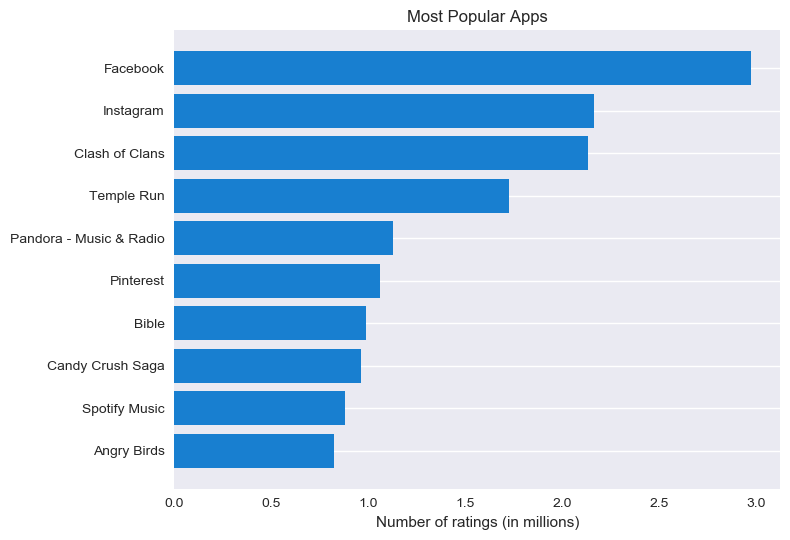

In [44]:
fig, ax = plt.subplots(dpi=100)

pop_apps = apps.sort_values(by="rating_count_tot", ascending=False).head(10)
names = pop_apps.loc[:, "track_name"]
y_pos = range(len(names))
ratings = pop_apps.loc[:, "rating_count_tot"].apply(lambda x: x / 1000000)

ax.barh(y=y_pos, width=ratings, color="#187FD0")
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()
ax.set_xlabel("Number of ratings (in millions)")
ax.set_title("Most Popular Apps")
ax.grid(axis="x")

plt.tight_layout()
plt.show()

### What are the categories of the most popular apps?
The chart below shows that the largest category of most popular apps is games.

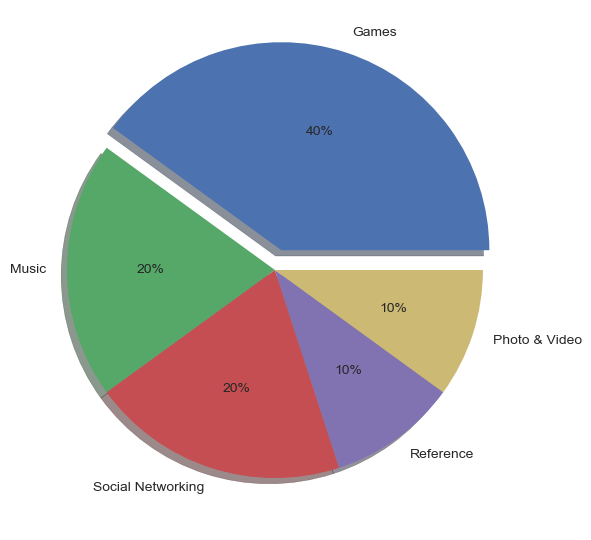

In [45]:
categories = pop_apps.loc[:, "prime_genre"].value_counts().index.tolist()
slices = list(pop_apps.loc[:, "prime_genre"].value_counts())
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots(dpi=100)
ax.pie(x=slices,
       explode=explode,
       labels=categories,
       autopct="%1.0f%%"
      )

fig.tight_layout()
plt.show()

### How are the ratings of the most popular apps?
The average rating of all apps is 3.5 stars, which means that the most popular apps, except Facebook, have ratings for all versions that are above the average. However, when you look at the ratings for the most recent app versions, you can see that some ratings have dropped. The new versions of Instagram, Temple Run, Pinterest, and Angry Birds are less loved among users. Pandora and Bible have improved their apps.

In [47]:
round(apps.loc[:, "user_rating"].mean(), 1)

3.5

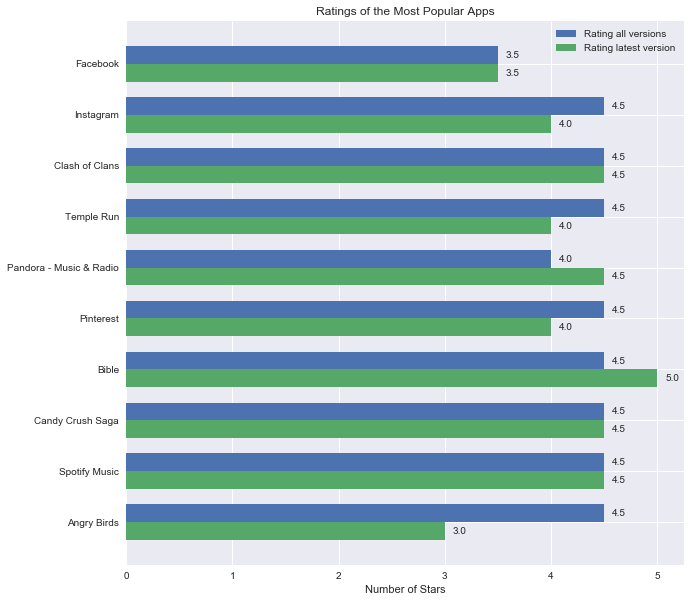

In [48]:
names = pop_apps.loc[:, "track_name"]
tot_ratings = pop_apps.loc[:, "user_rating"]
ver_ratings = pop_apps.loc[:, "user_rating_ver"]

y_pos = np.arange(len(names))
height = 0.35
    
fix, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.barh(y_pos - height / 2, tot_ratings, height, label="Rating all versions")
rects2 = ax.barh(y_pos + height / 2, ver_ratings, height, label="Rating latest version")

ax.set_xlabel("Number of Stars")
ax.set_title("Ratings of the Most Popular Apps")
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()
ax.legend()

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate("{}".format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(15, -3),
                    textcoords="offset points",
                    ha="center")

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

---
### What are the sizes of the most popular apps?
The average size of the most popular apps is more than 150 million bytes. Fun fact, the first version of macOS, which launched in 1984, was 216,000 bytes. The Facebook mobile app is more than 700 times larger than the first macOS.

In [49]:
f"{pop_apps.sort_values(by='size_bytes', ascending=False).loc[:, 'size_bytes'].mean():,}"

'151,535,206.4'